In [1]:
import pandas as pd
import numpy as np
import zipfile
import os

# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'

# d1 has strong seasonal pattern, from Min, Max time series plot
# d11 may be something to do with market cap

def plot_timeseries_dist(df, scorecol, dtcol, plot_min_max=False):
    
    if plot_min_max:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                 index=['Min', '20%', '40%', '60%', '80%', 'Max']))
    else:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8)],
                 index=['20%', '40%', '60%', '80%']))
    ts_series.unstack().plot()

In [2]:
ds_id = 11
csvfile = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'
dtcol = 'data_date'
seccol = 'security_id'

with zipfile.ZipFile(os.path.join(data_root, 'data_sets.zip')) as zf:
    df = pd.read_csv(zf.open(csvfile), parse_dates=['data_date'], dtype={'security_id': str})
    df[scorecol] = pd.to_numeric(df[scorecol], errors='coerce')
    df.sort_values(by=['data_date', 'security_id'], inplace=True)

In [3]:
print(df.duplicated(subset=[dtcol, seccol]).sum())
print(df.shape)

0
(3281273, 3)


In [4]:
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
print(df.head(), '\n\n')
print(df.tail(), '\n\n')
print(df.shape, '\n\n')
print(df.dtypes, '\n\n')
print(df.isnull().sum(), '\n\n')

         data_date security_id         d11
341942  2010-01-04     1000201    44.71284
344181  2010-01-04     1004801  3033.97300
347713  2010-01-04     1009601    63.83814
2614461 2010-01-04    10154401   364.58960
351828  2010-01-04     1017601   380.92260 


         data_date security_id            d11
10872   2017-12-29       97801     172.838811
335335  2017-12-29      985601  104011.200000
2614460 2017-12-29     9931801    1039.872000
338472  2017-12-29      993201     419.693000
341941  2017-12-29      996501    6219.194000 


(3281273, 3) 


data_date      datetime64[ns]
security_id            object
d11                   float64
dtype: object 


data_date         0
security_id       0
d11            1168
dtype: int64 




Before dropping NaNs 3281273
Before dropping NaNs 3280105


<AxesSubplot:xlabel='data_date'>

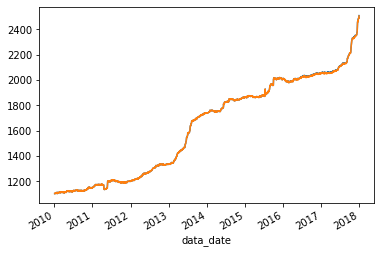

In [5]:
print("Before dropping NaNs", df.shape[0])
df.groupby(dtcol).size().plot()
df.dropna(subset=[scorecol], inplace=True)
print("Before dropping NaNs", df.shape[0])
df.groupby(dtcol).size().plot()

In [6]:
df[scorecol].describe()

count    3.280105e+06
mean     1.808543e+03
std      9.222737e+03
min      3.000001e+00
25%      5.286191e+01
50%      2.047238e+02
75%      7.266331e+02
max      6.081597e+05
Name: d11, dtype: float64

In [7]:
rsch_universe = pd.read_csv('/home/jma/Python3.7/Cubist_2021_11/rsch_universe.csv.gz', 
                            usecols=['data_date', 'security_id'], 
                            parse_dates=['data_date'], dtype={'security_id': str})

In [8]:
data = df.merge(rsch_universe, on=['data_date', 'security_id'], how='inner')
print(data.head())

   data_date security_id         d11
0 2010-01-04     1000201   44.712840
1 2010-01-04     1009601   63.838140
2 2010-01-04    10154401  364.589600
3 2010-01-04     1017601  380.922600
4 2010-01-04    10208901    3.540342


In [11]:
ts_series = data.groupby(dtcol)[scorecol].apply(
    lambda x: pd.Series([x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                         index=['Min', '20%', '40%', '60%', '80%', 'Max']))
ts_series = ts_series.unstack().reset_index()

<AxesSubplot:xlabel='data_date'>

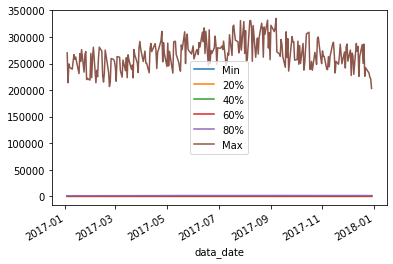

In [12]:
yr = '2017'
ts_series.loc[ts_series[dtcol].between(f'{yr}-01-01', f'{yr}-12-30')].set_index(dtcol).plot()

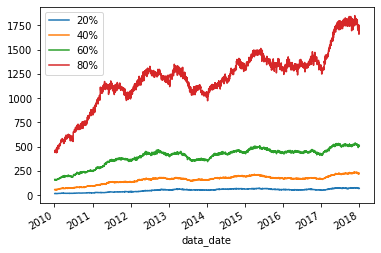

In [9]:
plot_timeseries_dist(data, scorecol, dtcol=dtcol, plot_min_max=False)
# d11 may be some market cap related measure 

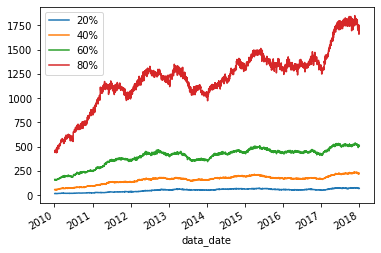

In [15]:
plot_timeseries_dist(data, scorecol, dtcol=dtcol, plot_min_max=False)
# d11 may be some market cap related measure 

In [16]:
ts_series.tail()

data_date  Min        20%        40%        60%        80%       Max
2008 2017-12-22  0.0  70.645970  228.29474  506.34008  1708.9412  242138.7
2009 2017-12-26  0.0  69.880590  221.54250  517.06720  1749.0950  232240.5
2010 2017-12-27  0.0  71.039392  217.26074  517.71724  1656.4222  224201.4
2011 2017-12-28  0.0  67.752788  223.36866  501.34768  1704.8732  221720.6
2012 2017-12-29  0.0  69.943018  225.91520  502.62102  1672.3664  203224.9

<AxesSubplot:xlabel='data_date'>

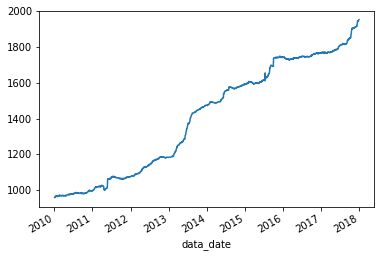

In [10]:
data.groupby("data_date").size().plot()

In [11]:
data[scorecol].describe()

count    2.834258e+06
mean     2.058916e+03
std      9.889442e+03
min      3.000001e+00
25%      7.240593e+01
50%      2.616876e+02
75%      8.827876e+02
max      6.081597e+05
Name: d11, dtype: float64

In [12]:
data.to_csv(os.path.join(data_root, 'data_11.csv.gz'), index=False, compression='gzip')